# Classification
## Let's start!!
![](https://i.imgur.com/ArhCF7i.png)

如課堂所說，監督式學習運用data萃取出矩陣``X``(shape 為``[n_samples, n_features]`` )和給定的``label`` 來 train model。在``scikit-learn``中target的shape為``(n_samples,)``。

訓練之後我們可以輸入新的``X_new``來得出新的``y_new``
 
    
## Classification
這個範例用來展示scikit-learn 機器學習套件，如何用SVM Classifier(目前當成黑盒子即可)來達成手寫的數字辨識

- 利用 make_classification 建立模擬資料
- 利用 sklearn.datasets.load_digits() 來讀取內建資料庫
- 用線性的SVC來做分類，以8x8的影像之像素值來當作特徵(共64個特徵)
- 用 metrics.classification_report 來提供辨識報表

> 在 scikit-learn中一個 estimator物件 (不論是supervise 或 unsupervised )都會實做 ``fit(X, y)`` 和 ``predict(X_new)``這兩個function.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()

接下來的步驟則是用``classifier = svm.SVC(gamma=0.001)``產生一個SVC分類器(Support Vector Classification)。

再將一半的資料送入分類器來訓練``classifier.fit``(資料:898x64, 分類目標:898x1)

最後再利用後半部份的資料來測試訓練完成的``SVC``分類器``predict(data[n_samples/2:])``將預測結果存入``predicted``變數。

原先的真實目標資料則存於``expected``變數。

In [ ]:
n_samples, n_features = digits.data.shape
# 產生SVC分類器
clf = svm.SVC(gamma=0.001)

# 用前半部份的資料來訓練
clf.fit(digits.data[:n_samples/2], digits.target[:n_samples/2])

In [ ]:
expected = digits.target[n_samples/2:]

#利用後半部份的資料來測試分類器，共 899筆資料
predicted = clf.predict(digits.data[n_samples/2:])

若是觀察 expected 及 predicted 矩陣中之前10個變數可以得到:

In [4]:
expected[:10], predicted[:10]

(array([8, 8, 4, 9, 0, 8, 9, 8, 1, 2]), array([8, 8, 4, 9, 0, 8, 9, 8, 1, 2]))

這說明了前10個元素中，我們之前訓練完成的分類機，正確的分類了手寫數字資料!! 那對於全部測試資料的準確度呢？要如何確認呢？

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(expected, predicted)

0.96885428253615125

判斷準確度方面，我們可以使用一個名為 ``Confusion matrix`` 的方式來統計

In [6]:
print("Confusion matrix:\n%s"% metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


圖像化表示此矩陣

/projects/sage/sage-6.10/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


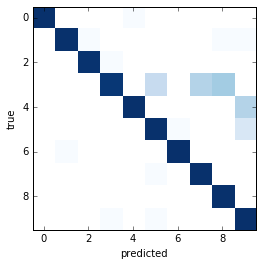

In [7]:
plt.imshow(np.log(metrics.confusion_matrix(expected, predicted)), cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

使用``sklearn``中之``metrics``物件，``metrics.confusion_matrix``(真實資料:899, 預測資料:899)可以列出上面矩陣。此矩陣對角線左上方第一個數字 87，代表實際為``0``且預測為``0``的總數有87個，同一列(row)第五個元素則代表，實際為``0``但判斷為``4``的資料個數為1個。

以手寫影像3為例，我們可以用四個數字來探討判斷的精準度。

- True Positive(TP):實際為3且判斷為3，共79個
- False Positive(FP):判斷為3但判斷錯誤，共2個
- False Negative(FN):實際為3但判斷錯誤，共12個
- True Negative(TN):實際不為3，且判斷正確。也就是其餘899-79-2-12=885個

以手寫影像3為例準確度為

- precision = TP/(TP+FP) = 79/81 = 0.98 #判斷為3且實際為3的比例為0.98

更多的相關數據可自動產生

In [8]:
print("Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




我們將部分的影像和預測結果一起標示出來，錯誤的地方將用宏色來標示:

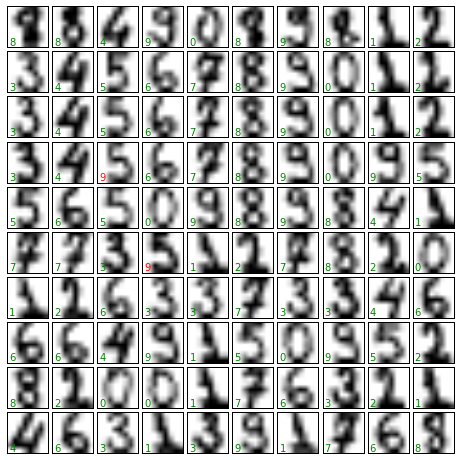

In [9]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.data[n_samples/2:][i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(predicted[i]),
            transform=ax.transAxes,
            color='green' if (expected[i] == predicted[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

我們一般會將``model(weights)``存下來方便下次做prediction

In [10]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)

import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [11]:
y[0]

0

# Yet Another Classification Example

K nearest neighbors (kNN) 是最簡潔的機器學習演算法之一，在訓練階段他只是把輸入的data相關參數和給的label存起來，之後給定一個新的data，他會去找空間上最近的``k``個點，然後讓這``k``個點做投票屬於哪類，最多的那類就是預測結果! 

In [12]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


In [13]:
knn.predict_proba([[3, 5, 4, 2],]) #也可以用來算出機率!!

array([[ 0. ,  0.8,  0.2]])

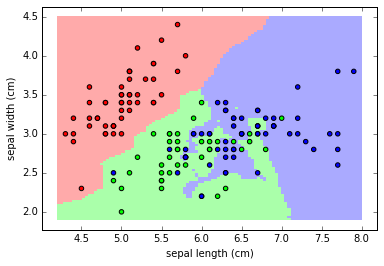

In [14]:
from fig_code import plot_iris_knn
plot_iris_knn()